# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

    
# Print the city count to confirm sufficient count
print(len(cities))
# #print(cities)
# print("*******************************************************************************************")
# print("Temporarily reducging cities from cities to cities[0:30] so only get 30 cities intially")
# print("before calling api.openweathermap.org since they have limits") 
# print("I believe 60 calls/minute and 1M calls/month per month)")
# cities = cities[0:30]
# print("*******************************************************************************************")
# print(cities)

617


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
lon = []
temp = []
temp_max = []
humidity=[]
clouds=[]
wind=[]
country = []
dt = []

del_cities = []
del_cities_index = []
i = 0
city_counter=0
number_valid_cities=1

# print("*******************************************************************************************")
# print("Temporarily reducging cities from cities to cities[0:30] so only get 30 cities intially")
# print("before calling api.openweathermap.org since they have limits") 
# print("I believe 60 calls/minute and 1M calls/month per month)")
# cities = cities[0:3]
# print("*******************************************************************************************")

#print("cities")
#print(cities)
# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("---------------------------------")
for city in cities:
    #print(f'city is {city}')
    try:
        response = requests.get(query_url + city).json()
        time.sleep(0.01)
        lat.append(response['coord']['lat'])
        #print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        lon.append(response['coord']['lon'])
        #print(f"The longitude information for city {city} #{city_counter} received is: {lon}")
        temp.append(response['main']['temp'])
        #print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
        temp_max.append(response['main']['temp_max'])
        #print(f"The temperature Maximum information for city {city} #{city_counter} received is: {temp_max}")
        humidity.append(response['main']['humidity'])
        #print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
        clouds.append(response['clouds']['all'])
        #print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
        wind.append(response['wind']['speed'])
        #print(f"The windiness information for city {city} #{city_counter} received is: {wind}")
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        print(f'Processing city #{number_valid_cities} for city named {city}')
        number_valid_cities += 1
        
    except KeyError:
        print()
        print("Oops! City not found, removing the invalid city from cities")
        #print(f'Issue with {city} of index {city_counter}')
        del_cities_index.append(city_counter)
        #print('len(del_cities_index)')
        #print(len(del_cities_index))        
        
    city_counter+=1
# print('cities')
# print(cities)
# print('dt')
# print(dt)

#print('len(del_cities_index)')
#print(len(del_cities_index))

if len(del_cities_index)>0:
    #print("inside if")
    for i in range(len(del_cities_index)-1, -1, -1):
        #print("inside for")
        #print(f'i={i}')
        #print(f'del_cities_index[i]')
        #print(del_cities_index[i])
        j=int((del_cities_index[i]))
        #print(f'j={j}')
        del cities[j]
#print('cities after del')
#print(cities)

# from the list
#print(f'cities is now {cities}')
#print()
    
# # Build query URL
# query_url = url + "appid=" + weather_api_key + "&q=" + city  

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + 'cape town'  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

print("---------------------------------")
print("Data Retrevial Complete")
print("---------------------------------")

# # Get the temperature from the response
# print(f"The weather API responded with: {weather_json}.")

Beginning Data Retrieval
---------------------------------
Processing city #1 for city named ushuaia
Processing city #2 for city named hilo
Processing city #3 for city named kismayo
Processing city #4 for city named mataura
Processing city #5 for city named burma
Processing city #6 for city named riyadh
Processing city #7 for city named port alfred
Processing city #8 for city named hermanus
Processing city #9 for city named waipawa
Processing city #10 for city named rikitea
Processing city #11 for city named sitka
Processing city #12 for city named kankaanpaa
Processing city #13 for city named san patricio
Processing city #14 for city named dikson
Processing city #15 for city named provideniya
Processing city #16 for city named qaanaaq
Processing city #17 for city named busselton
Processing city #18 for city named ponta do sol
Processing city #19 for city named eirunepe
Processing city #20 for city named roebourne
Processing city #21 for city named marystown
Processing city #22 for cit

Processing city #161 for city named gigmoto
Processing city #162 for city named olinda
Processing city #163 for city named ughelli
Processing city #164 for city named kindia
Processing city #165 for city named odessa
Processing city #166 for city named bethel
Processing city #167 for city named boali
Processing city #168 for city named komsomolskiy
Processing city #169 for city named kaeo
Processing city #170 for city named carnarvon
Processing city #171 for city named plainview
Processing city #172 for city named tuatapere
Processing city #173 for city named cherskiy
Processing city #174 for city named arman
Processing city #175 for city named ancud
Processing city #176 for city named castro
Processing city #177 for city named saskylakh
Processing city #178 for city named san quintin
Processing city #179 for city named nanortalik
Processing city #180 for city named barra

Oops! City not found, removing the invalid city from cities
Processing city #181 for city named constitucion
Proce

Processing city #330 for city named gemena
Processing city #331 for city named rio gallegos
Processing city #332 for city named leiyang
Processing city #333 for city named borovskoy
Processing city #334 for city named derzhavinsk
Processing city #335 for city named eureka
Processing city #336 for city named guiglo
Processing city #337 for city named palora
Processing city #338 for city named comodoro rivadavia
Processing city #339 for city named half moon bay
Processing city #340 for city named mar del plata
Processing city #341 for city named robertsport
Processing city #342 for city named umm lajj
Processing city #343 for city named asfi
Processing city #344 for city named kuching

Oops! City not found, removing the invalid city from cities
Processing city #345 for city named iwanai
Processing city #346 for city named sesheke
Processing city #347 for city named longido
Processing city #348 for city named khromtau
Processing city #349 for city named batagay
Processing city #350 for ci


Oops! City not found, removing the invalid city from cities
Processing city #492 for city named vanimo
Processing city #493 for city named tabou
Processing city #494 for city named ismailia
Processing city #495 for city named capaci
Processing city #496 for city named alta floresta
Processing city #497 for city named antipovka

Oops! City not found, removing the invalid city from cities
Processing city #498 for city named locri
Processing city #499 for city named tabligbo

Oops! City not found, removing the invalid city from cities
Processing city #500 for city named burnie
Processing city #501 for city named bacabal
Processing city #502 for city named biasca
Processing city #503 for city named antofagasta
Processing city #504 for city named coari
Processing city #505 for city named gorin
Processing city #506 for city named grindavik
Processing city #507 for city named mporokoso
Processing city #508 for city named cairns
Processing city #509 for city named port-cartier

Oops! City not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, temp, etc
#print(f'City {cities}')
#print(f'Lat {lat}')
      
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "TempMax": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind,
    "Country":country,
    "Date":dt
}

# print("weather_dict")
# print(weather_dict)
# print()

weather_data = pd.DataFrame(weather_dict)
# print(weather_data)

# Save as a csv
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

# Display the DataFrame
weather_data.head()

,city,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.81,6.81,81,40,12.86,AR,1644549351
1,hilo,19.7297,-155.0900,22.79,23.85,77,0,2.57,US,1644549133
2,kismayo,-0.3582,42.5454,24.96,24.96,79,82,7.36,SO,1644549352
3,mataura,-46.1927,168.8643,17.49,17.49,52,34,3.19,NZ,1644549353
4,burma,22.0000,98.0000,19.82,19.82,34,0,0.94,MM,1644549353


In [5]:
# Display the DataFrame
weather_data.describe()

,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.003827,18.910777,10.458277,10.842060,72.907638,54.412078,3.378686,1.644549e+09
std,33.709683,91.097359,16.620599,16.617742,20.640767,42.173013,2.459229,1.017741e+02
min,-54.800000,-179.166700,-34.340000,-34.340000,9.000000,0.000000,0.000000,1.644549e+09
25%,-8.478800,-63.345550,0.415000,0.995000,63.000000,6.000000,1.570000,1.644549e+09
50%,21.483300,23.716200,16.040000,16.400000,77.000000,67.000000,2.710000,1.644549e+09
75%,47.735450,99.167700,23.725000,23.835000,89.000000,100.000000,4.415000,1.644549e+09
max,78.218600,179.316700,40.910000,40.910000,100.000000,100.000000,15.500000,1.644550e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [6]:
cities_high_humidity = []
city_counter=0
for city in cities:
    if int(humidity[city_counter]) >100:
        #print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new list to track high humifity index values
        cities_high_humidity.append(city_counter)
        #print(f"{city} with city_counter of {city_counter} has humidty >80 so need to remove later")
        city_counter+=1
    else:
        # print("Skip since no humidity >100")
        city_counter+=1
#print("Latest cities_high_humidity")
#print(cities_high_humidity)

In [7]:
#  Get the indices of cities that have humidity over 100%.
#print("Latest cities_high_humidity")
cities_high_humidity

[]

In [8]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=clean_city_data.drop(cities_high_humidity, inplace=False) 
# else:
#     print("No high humidity data") 
# print("weather_data") 
# print(weather_data)
# print()
# print("clean_city_data") 
# print(clean_city_data)
# print()

clean_city_data.reset_index(inplace=True)
#print("clean_city_data after reset index") 
clean_city_data


,index,city,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,ushuaia,-54.8000,-68.3000,6.81,6.81,81,40,12.86,AR,1644549351
1,1,hilo,19.7297,-155.0900,22.79,23.85,77,0,2.57,US,1644549133
2,2,kismayo,-0.3582,42.5454,24.96,24.96,79,82,7.36,SO,1644549352
3,3,mataura,-46.1927,168.8643,17.49,17.49,52,34,3.19,NZ,1644549353
4,4,burma,22.0000,98.0000,19.82,19.82,34,0,0.94,MM,1644549353
...,...,...,...,...,...,...,...,...,...,...,...
558,558,kysyl-syr,63.8986,122.7617,-30.23,-30.23,95,56,1.28,RU,1644549552
559,559,cap malheureux,-19.9842,57.6142,26.93,26.93,73,4,2.23,MU,1644549553
560,560,charters towers,-20.1000,146.2667,33.47,33.47,33,0,2.75,AU,1644549553
561,561,buchanan,5.8808,-10.0467,24.98,24.98,91,25,1.75,LR,1644549553


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

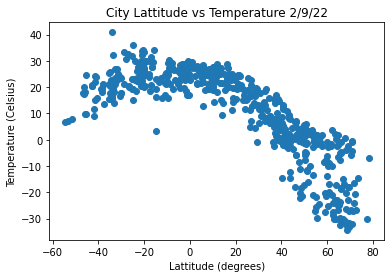

This first scatter chart compares Lattitude to Temperature.
It helps shows that closer to the Equator (e.g. +/- so dergrees) the hugher the temperatures


In [9]:
# print("clean_city_data") 
# print(clean_city_data)

# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('City Lattitude vs Temperature 2/9/22')
# Save the figure
plt.savefig("output_data/lat_temp.png")
# Display the garph
plt.show()
print("This first scatter chart compares Lattitude to Temperature.")
print("It helps shows that closer to the Equator (e.g. +/- so dergrees) the hugher the temperatures")

## Latitude vs. Humidity Plot

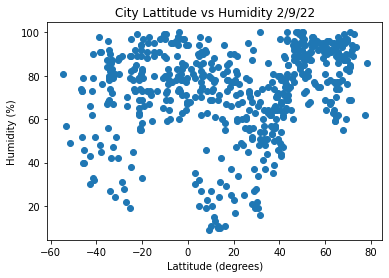

This scatter chart compares Lattitude to Humidity.
Much to my surprise, Humidity is more spreadout than I expected


In [10]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title('City Lattitude vs Humidity 2/9/22')

# Save the figure
plt.savefig("output_data/lat_hum.png")
# Display the garph
plt.show()

print("This scatter chart compares Lattitude to Humidity.")
print("Much to my surprise, Humidity is more spreadout than I expected")

## Latitude vs. Cloudiness Plot

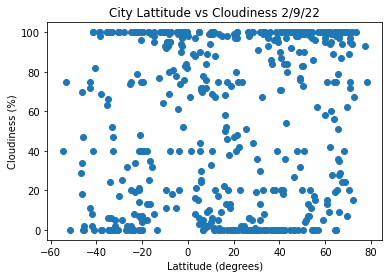

This scatter chart compares Lattitude to Cloudines.
It helps shows that cloudiness is quide varied and how many cloud patterns appear to align along the lattidue lines


In [11]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title('City Lattitude vs Cloudiness 2/9/22')
# Save the figure
plt.savefig("output_data/lat_cloud.png")
# Display the garph
plt.show()

print("This scatter chart compares Lattitude to Cloudines.")
print("It helps shows that cloudiness is quide varied")

## Latitude vs. Wind Speed Plot

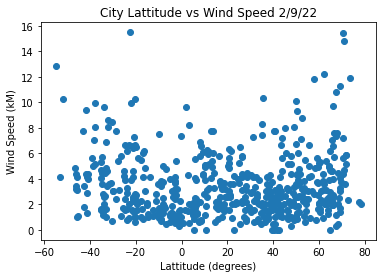

This scatter chart compares Lattitude to Wind Speed.
It helps shows how relatively consistant and mild wind speed is typically


In [12]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.title('City Lattitude vs Wind Speed 2/9/22')
# Save the figure
plt.savefig("output_data/lat_wind.png")
# Display the garph
plt.show()

print("This scatter chart compares Lattitude to Wind Speed.")
print("It helps shows how relatively consistant and mild wind speed is typically")

## Linear Regression

The correlation between both factors is -0.78
The r-value is: -0.784620314046395
line_eq is: y = -0.39x + 17.81


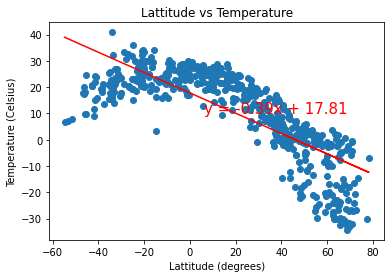

This linear regression plot compares the 'current' Temp to Lattitude.
It helps shows the correlation of the temperature is typically warmest around the Equator...just like we set out to show.


In [23]:
# Calculate the correlation coefficient and linear regression model 

x_values = clean_city_data["lat"]
y_values = clean_city_data["temp"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/linear_reg.png")
plt.show()

print("This linear regression plot compares the 'current' Temp to Lattitude.")
print("It helps shows the correlation of the temperature is typically warmest around the Equator...just like we set out to show.")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8761462839505335
line_eq is: y = -0.72x + 32.78


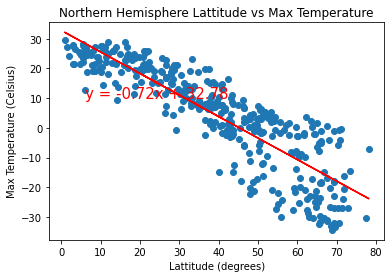

This linear regression plot compares Northern Hemisphere Max Temp to Lattitude.
It helps shows the correlation that the temperature decreases as you get closer to the North Pole.


In [14]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

# Set-up and initialize variables 
city_counter = 0
northern_city_counter = 0
southern_city_counter = 0
northern_hemisphere_city = []
southern_hemisphere_city = []
      
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
northern_hemisphere_data = clean_city_data
southern_hemisphere_data = clean_city_data

# Create Northen Hemisphere and Southern Hemisphere lists
for city_counter in range(0, len(clean_city_data)):
    if clean_city_data["lat"][city_counter] >= 0:
        northern_hemisphere_city.append(city_counter)

        # Drop southern_hemisphere_data point from northern_hemisphere_data    
        southern_hemisphere_data=southern_hemisphere_data.drop(city_counter, inplace=False)

    else:
        # Southern_hemisphere_city
        southern_hemisphere_city.append(city_counter)

        # Drop southern_hemisphere_data point from northern_hemisphere_data      
        northern_hemisphere_data=northern_hemisphere_data.drop(city_counter, inplace=False)

    city_counter += 1 
                    
x_values = northern_hemisphere_data["lat"]
y_values = northern_hemisphere_data["TempMax"]

correlation = st.pearsonr(x_values,y_values)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Max Temperature (Celsius)")
plt.title('Northern Hemisphere Lattitude vs Max Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/hh_temp_lat.png")

plt.show()         
            
print("This linear regression plot compares Northern Hemisphere Max Temp to Lattitude.")
print("It helps shows the correlation that the temperature decreases as you get closer to the North Pole.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.39
The r-value is: 0.3926144558149265
line_eq is: y = 0.93x + -43.09


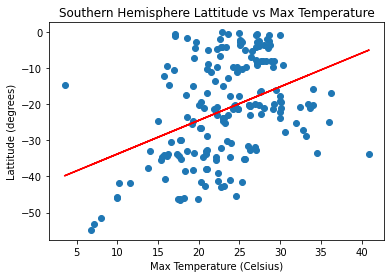

This linear regression plot compares Southern Hemisphere Max Temp to Lattitude.
It helps shows the relative correlation that the temperature increases as you get closer to the Equator.


In [15]:
x_values = southern_hemisphere_data["TempMax"]
y_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Max Temperature (Celsius)")
plt.ylabel("Lattitude (degrees)")
plt.title('Southern Hemisphere Lattitude vs Max Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/sh_temp_lat.png")
plt.show()
            
print("This linear regression plot compares Southern Hemisphere Max Temp to Lattitude.")
print("It helps shows the relative correlation that the temperature increases as you get closer to the Equator.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.43
The r-value is: 0.43249779060611376
line_eq is: y = 0.41x + 9.4


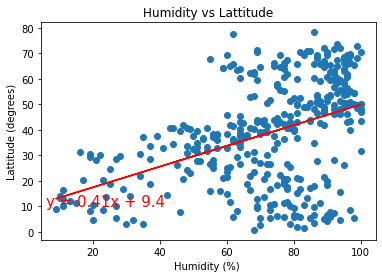

This linear regression plot compares Northern Hemisphere Humidity to Lattitude.
It helps shows that higher humidities can be experienced relatively consistantly accross the Northern Hemisphere


In [16]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%) ")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/nh_hum_lat.png")

plt.show()

            
print("This linear regression plot compares Northern Hemisphere Humidity to Lattitude.")
print("It helps shows that higher humidities can be experienced relatively consistantly accross the Northern Hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.36
The r-value is: 0.36008956369296713
line_eq is: y = 0.27x + -41.76


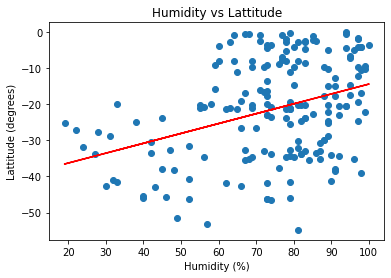

This linear regression plot compares Southern Hemisphere Humidity to Lattitude.
It helps shows that higher humidities can be experienced relatively consistantly accross the Southern Hemisphere


In [17]:
x_values = southern_hemisphere_data["Humidity"]
y_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/sh_hum_lat.png")

#time.sleep(0.5)
plt.show()

print("This linear regression plot compares Southern Hemisphere Humidity to Lattitude.")
print("It helps shows that higher humidities can be experienced relatively consistantly accross the Southern Hemisphere")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.29
The r-value is: 0.2874057314263925
line_eq is: y = 0.6x + 31.42


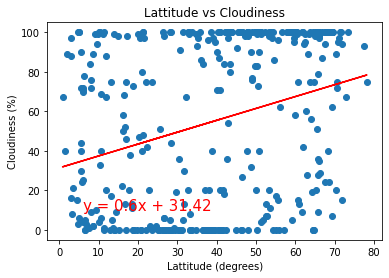

This linear regression plot compares Northern Hemisphere Cloudiness to Lattitude.
It helps shows that cloudiness can be experienced relatively consistantly accross the Northern Hemisphere


In [18]:
y_values = northern_hemisphere_data["Cloudiness"]
x_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
# print("slope, intercept, rvalue, pvalue, stderr")
# print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude (degrees)")
plt.title('Lattitude vs Cloudiness')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/nh_cloud_lat.png")

plt.show()

print("This linear regression plot compares Northern Hemisphere Cloudiness to Lattitude.")
print("It helps shows that cloudiness can be experienced relatively consistantly accross the Northern Hemisphere")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.43
The r-value is: 0.4263817150458092
line_eq is: y = 1.29x + 81.56


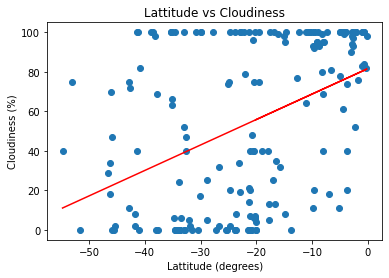

This linear regression plot compares Northern Hemisphere Cloudiness to Lattitude.
It helps shows that cloudiness can be experienced relatively consistantly the closer you get to the Equator


In [19]:
y_values = southern_hemisphere_data["Cloudiness"]
x_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude (degrees)")
plt.title('Lattitude vs Cloudiness')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/sh_cloud_lat.png")

plt.show()

print("This linear regression plot compares Northern Hemisphere Cloudiness to Lattitude.")
print("It helps shows that cloudiness can be experienced relatively consistantly the closer you get to the Equator")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.18
The r-value is: 0.17806941231210638
line_eq is: y = 1.51x + 33.6


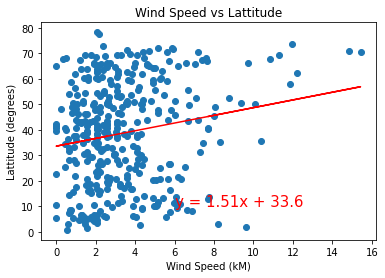

This scatter chart compares Lattitude to Wind Speed in the Northern Hmeisphere.
It helps shows how relatively consistant and mild wind speed is typically regardless of lattitude


In [20]:
x_values = northern_hemisphere_data["Wind Speed"]
y_values = northern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Wind Speed (kM)")
plt.ylabel("Lattitude (degrees)")
plt.title('Wind Speed vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/nh_lat_wind.png")

plt.show()

print("This scatter chart compares Lattitude to Wind Speed in the Northern Hmeisphere.")
print("It helps shows how relatively consistant and mild wind speed is typically regardless of lattitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.38
The r-value is: -0.37792102718260057
line_eq is: y = -0.07x + 1.93


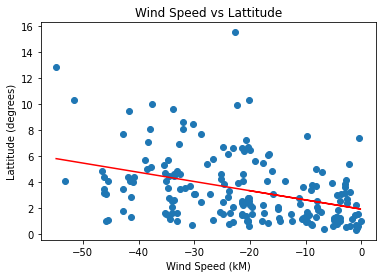

This scatter chart compares Lattitude to Wind Speed in the Southern Hmeisphere.
It helps shows how relative the mild wind speed is, especially as it gets closer to the Equator


In [21]:
y_values = southern_hemisphere_data["Wind Speed"]
x_values = southern_hemisphere_data["lat"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Wind Speed (kM)")
plt.ylabel("Lattitude (degrees)")
plt.title('Wind Speed vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/sh_lat_wind.png")

plt.show()

print("This scatter chart compares Lattitude to Wind Speed in the Southern Hmeisphere.")
print("It helps shows how relative the mild wind speed is, especially as it gets closer to the Equator")